1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

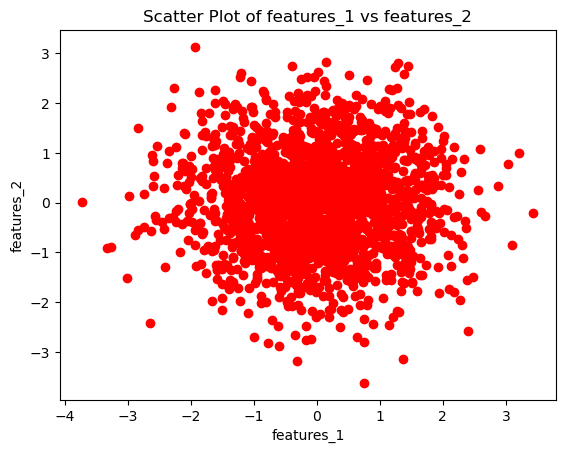

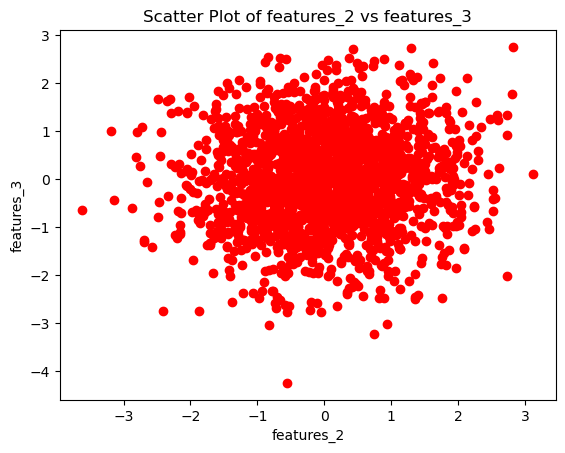

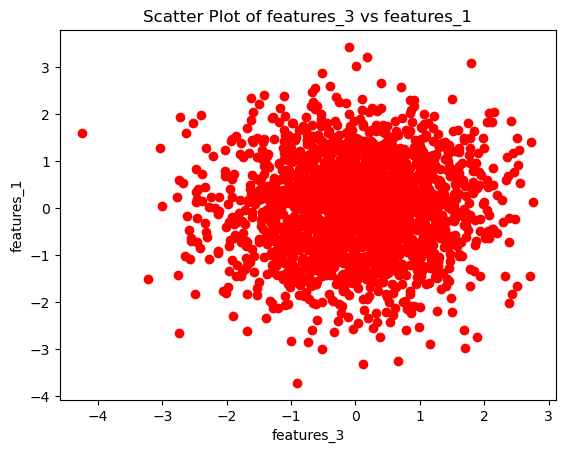

'\nThe features seems to have the same mean 0, since the points are more dense in a single region around (0, 0),\nand with same standard deviation, since axis have very similar scale and points are distribuited all around the center.\n'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

with open("data/regression_generated.csv", "r") as file:
    data = pd.read_csv(file)
    file.close()
c1 = "features_1"
c2 = "features_2"
for i in range(2,5):
    #scatter plot di una features su X e l'altra su Y
    plt.scatter(data[c1], data[c2], c="r")
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.title("Scatter Plot of {} vs {}".format(c1, c2))
    plt.show()
    #cambio le features da comparare per ottenere le varie combinazioni
    c1="features_{}".format(i)
    c2="features_{}".format(i+1)
    if c2=="features_4":
        c2="features_1"

'''
The features seems to have the same mean 0, since the points are more dense in a single region around (0, 0),
and with same standard deviation, since axis have very similar scale and points are distribuited all around the center.
'''

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

FileNotFoundError: No such file or directory: 'images/two_categories_scatter_plot.png'

FileNotFoundError: No such file or directory: 'images/two_categories_scatter_plot.png'

<IPython.core.display.Image object>

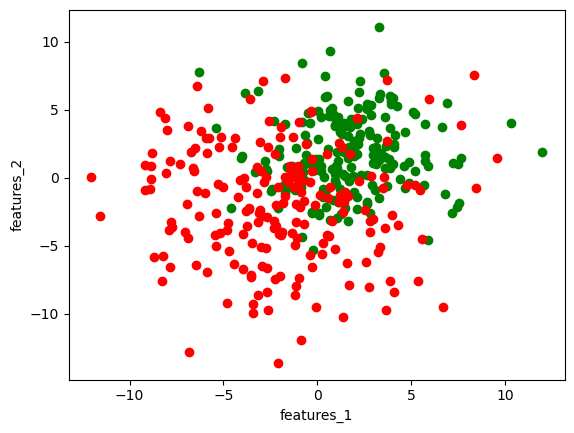

In [3]:
def generate_dataset(size, mu0, mu1, sigma0, sigma1):
    #creo un array di zeri con 3 colonne, la prima funge da label
    part0=np.zeros((size,3))
    part0[:,1] = np.random.normal(loc=mu0, scale=sigma0, size=part0.shape[0])
    part0[:,2] = np.random.normal(loc=mu0, scale=sigma0, size=part0.shape[0])
    #creo le due features (colonna 1 e 2) con le relative medie e varianze

    #creo un array di 1 con 3 colonne, la prima funge da label
    part1=np.ones((size,3))
    part1[:,1] = np.random.normal(loc=mu1, scale=sigma1, size=part1.shape[0])
    part1[:,2] = np.random.normal(loc=mu1, scale=sigma1, size=part1.shape[0])
    #creo le due features (colonna 1 e 2) con le relative medie e varianze
    dataset = np.concatenate((part0, part1))
    #unisco i due array e ritorno il dataset così creato
    return dataset
size=200
data = generate_dataset(size, 2, -2, 3, 4)
data0=data[:size, :]
data1=data[size:, :]
#mostro la prima label con un colore
plt.scatter(data0[:,1], data0[:,2], c="g")
plt.xlabel("features_1")
plt.ylabel("features_2")
#la seconda label con un colore diverso
plt.scatter(data1[:,1], data1[:,2], c="r")
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
import pickle

with open('data/residuals_261.pkl', 'rb') as f:
    res = pickle.load(f)
print(res, type(res), res.shape)

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])} <class 'numpy.ndarray'> ()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


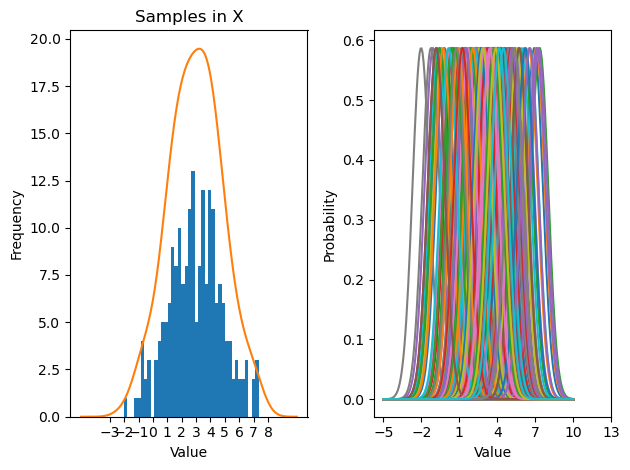

In [5]:
from scipy.stats import norm
from scipy.integrate import trapz
dim = 200
x = np.random.normal(loc=3, scale=2, size=dim)
bb=int(len(x)/5)
#creo 2 plot affiancati
fig, ax = plt.subplots(1, 2, tight_layout=True)
#sul primo plotto x
ax[0].hist(x, bins=bb)
ax[0].set_title('Samples in X')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks(np.arange(int(min(x))-1, int(max(x))+2, 1))
#z sarà l'asse per i plot delle gaussiane
z = np.linspace(-5, 10, dim)
#le colonne della matrice all_gaus saranno i valori della rispettiva gaussiana in ogni punto
all_gaus=np.zeros((dim, dim))
for i in range(dim):
    all_gaus[:,i] = norm.pdf(z, loc=x[i], scale=1.06*x.std()*x.size**(-0.2))
    ax[1].plot(z, all_gaus[:,i])
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Probability')
ax[1].set_xticks(np.arange(-5, 15, 3))
#in gaus sommo tutte le gaussiane (sommando sulle righe tutti i valori di all_gaus)
gaus = np.sum(all_gaus, axis=1)
#calcolo l'integrale dell'istogramma e della gaussiana risultante dalla somma
integral_histogram = trapz(np.histogram(x, bins=bb)[0], dx=0.5)
integral_gaus = trapz(gaus, dx=(z[1]-z[0]))
#normalizzo la gaussiana con il rapporto tra i due integrali
scaled_gaus = gaus * (integral_histogram / integral_gaus)
#plotto la gaussiana scalata sul primo plot
ax[0].plot(z, scaled_gaus)